In [1]:

from tensorflow.keras.datasets import mnist


(x_train, y_train), (x_test, y_test)  = mnist.load_data()


from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())


print("Initial shape or dimensions of x_train", str(x_train.shape))


print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))


print("\n")
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print("\n")
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

11490434/11490434 [==============================] - 2s 0us/step
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9273814790120391377
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14343274496
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3050207753728525126
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]
Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)


Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


In [2]:

img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]


x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


input_shape = (img_rows, img_cols, 1)


x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')


x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

from tensorflow.keras.utils import to_categorical


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Number of Classes: 10


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [4]:
batch_size = 128
epochs = 10


history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 17s 9ms/step - loss: 2.1285 - accuracy: 0.4592 - val_loss: 1.8533 - val_accuracy: 0.6605
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 1.2751 - accuracy: 0.7563 - val_loss: 0.7208 - val_accuracy: 0.8414
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.5672 - accuracy: 0.8557 - val_loss: 0.4385 - val_accuracy: 0.8855
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.4195 - accuracy: 0.8836 - val_loss: 0.3647 - val_accuracy: 0.8967
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3681 - accuracy: 0.8947 - val_loss: 0.3319 - val_accuracy: 0.9054
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3399 - accuracy: 0.9006 - val_loss: 0.3100 - val_accuracy: 0.9124
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3207 - accuracy: 0.9066 - val_loss: 0.2941 - val_accuracy: 0.9162
Epoc

In [5]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'conv2d': <keras.layers.convolutional.conv2d.Conv2D at 0x7f84f963a080>,
 'conv2d_1': <keras.layers.convolutional.conv2d.Conv2D at 0x7f84f963af80>,
 'max_pooling2d': <keras.layers.pooling.max_pooling2d.MaxPooling2D at 0x7f8474e12e30>,
 'flatten': <keras.layers.reshaping.flatten.Flatten at 0x7f84f963add0>,
 'dense': <keras.layers.core.dense.Dense at 0x7f8474e111e0>,
 'dense_1': <keras.layers.core.dense.Dense at 0x7f8474d0cbe0>}

In [6]:

for layer in model.layers:
  
  
  if 'conv' not in layer.name:
    continue

 
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

conv2d (3, 3, 1, 32)
conv2d_1 (3, 3, 32, 64)


In [7]:
filters, biases = model.layers[0].get_weights()

In [8]:
print(filters.shape)
filters

(3, 3, 1, 32)


array([[[[ 1.44398317e-01, -6.42524734e-02,  4.29496495e-03,
           1.38490409e-01,  1.59210280e-01,  3.03264596e-02,
           1.25577182e-01,  1.22925624e-01,  5.95953688e-02,
           5.90679273e-02, -9.45490748e-02,  3.83608378e-02,
           4.39154468e-02,  5.90207465e-02, -9.27711502e-02,
           1.14307918e-01, -1.11768618e-01,  1.80221736e-01,
           1.80894118e-02,  1.92504615e-01,  2.35135883e-01,
           5.65787889e-02, -1.30014509e-01, -6.00829311e-02,
          -1.30055293e-01,  1.58454418e-01,  1.90016732e-01,
          -3.20359841e-02, -3.85972559e-02,  8.24936032e-02,
           1.56516850e-01, -4.40733843e-02]],

        [[-1.37105491e-02,  7.54812645e-05, -1.78692061e-02,
           1.58331722e-01,  1.85425088e-01, -8.00530985e-02,
           4.08654436e-02,  1.41318008e-01, -8.07208493e-02,
           7.10450932e-02,  1.09775595e-01,  9.87649113e-02,
           1.97497196e-03, -1.36507303e-01,  5.12172561e-03,
           1.13293350e-01, -4.66085263

In [9]:
print(biases.shape)
biases

(32,)


array([ 5.57069579e-05,  2.74712773e-04,  3.10132336e-02,  1.85566340e-02,
        4.28988691e-03,  3.10681183e-02, -7.73935335e-06,  4.99902712e-03,
       -3.19882622e-03,  4.58045537e-03,  1.51797654e-02,  6.79557025e-03,
        2.03694813e-02,  1.32998666e-02, -1.29991040e-05,  1.55006619e-02,
       -7.62969648e-06,  2.37405524e-02,  5.30470221e-04,  1.31460365e-05,
        1.21307943e-03, -2.04170647e-06,  1.92105491e-02, -5.57968218e-04,
        2.72499427e-04,  6.15662755e-03,  4.30075088e-05,  2.55461950e-02,
        1.05153425e-02,  1.39692882e-02,  1.09086391e-02,  6.13221806e-03],
      dtype=float32)

In [10]:
f_min, f_max = filters.min(), filters.max()
print(f'Before Normalisation, Min = {f_min} and Max =  {f_max}')
filters = (filters - f_min) / (f_max - f_min)
print(f'After Normalisation, Min = {filters.min()} and Max =  {filters.max()}')

Before Normalisation, Min = -0.14208480715751648 and Max =  0.2940315306186676
After Normalisation, Min = 0.0 and Max =  1.0


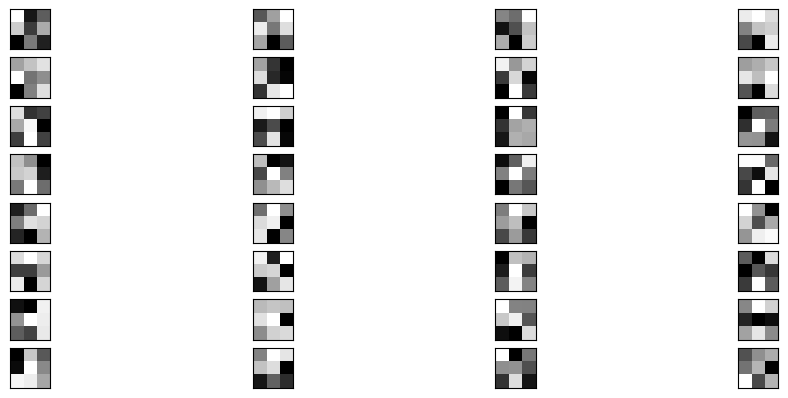

In [11]:
import matplotlib.pyplot as plt
import numpy as np


n_filters, ix = 32, 1
plt.figure(figsize=(12,20))

for i in range(n_filters):
    
    f = filters[:, :, :, i]
    

    
    ax = plt.subplot(n_filters, 4, ix)
    ax.set_xticks([])
    ax.set_yticks([])

    
    plt.imshow(np.squeeze(f, axis=2), cmap='gray')
    ix += 1
    

plt.show()

In [12]:
from tensorflow.keras.models import Model

layer_outputs = [layer.output for layer in model.layers[:2]]

activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [13]:
layer_outputs

[<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 24, 24, 64) dtype=float32 (created by layer 'conv2d_1')>]

(-0.5, 27.5, 27.5, -0.5)

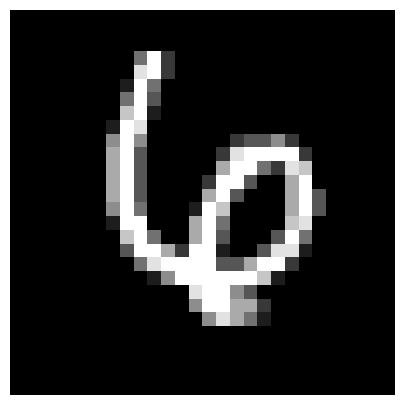

In [14]:
import matplotlib.pyplot as plt

img_tensor = x_test[22].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img_tensor[0,:,:,0],cmap="gray")
plt.axis('off')

In [15]:
activations = activation_model.predict(img_tensor)

print("Number of layer activations: " + str(len(activations)))

1/1 [==============================] - 0s 138ms/step
Number of layer activations: 2


In [16]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 32)


In [17]:
second_layer_activation = activations[1]
print(second_layer_activation.shape)

(1, 24, 24, 64)


In [18]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

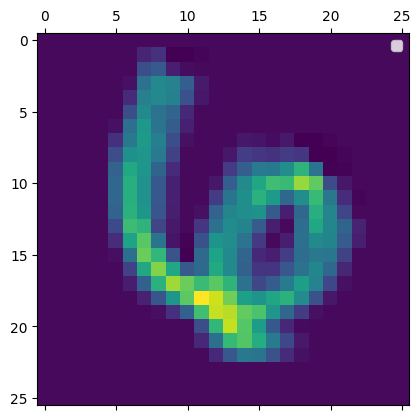

In [19]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.legend()

In [20]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='viridis')
            activation_index += 1

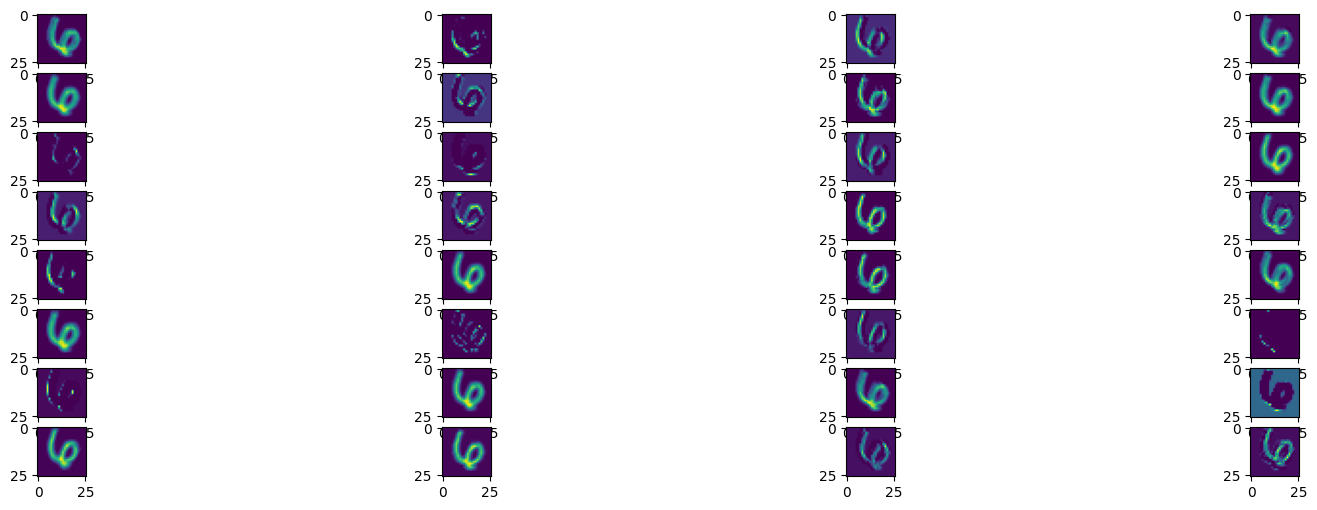

In [21]:
display_activation(activations, 4, 8, 0)